In [2]:

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder


In [8]:
conn = sqlite3.connect("../Data/products.db")
products_df = pd.read_sql_query("SELECT * FROM Products", conn)
conn.close()

products_df.head()

,product_id,name,category,price,brand,rating,stock,warranty_years,supplier_country,weight_kg,volume_cm3,power_watt,connectivity_type,material_type,usage_type,price_category
0,1,Wireless Mouse,Accessories,15.99,Logitech,4.4,158,3,USA,5.26,11659.0,2.0,Wireless,Metal,Peripheral,Low
1,2,Keyboard,Accessories,22.50,Logitech,4.2,106,3,China,5.56,16437.0,0.0,Both,Metal,Peripheral,Medium
2,3,Monitor,Electronics,150.00,Samsung,4.9,155,3,Japan,2.26,14371.0,10.0,None,Plastic,Peripheral,High
3,4,USB Cable,Accessories,5.99,Anker,4.3,283,2,Japan,2.73,12261.0,0.0,None,Metal,Display,Low
4,5,Laptop Stand,Accessories,25.00,AmazonBasics,4.3,274,1,South Korea,0.47,3032.0,20.0,Both,Mixed,Furniture,Medium


In [10]:
print(products_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         25 non-null     int64  
 1   name               25 non-null     object 
 2   category           25 non-null     object 
 3   price              25 non-null     float64
 4   brand              25 non-null     object 
 5   rating             25 non-null     float64
 6   stock              25 non-null     int64  
 7   warranty_years     25 non-null     int64  
 8   supplier_country   25 non-null     object 
 9   weight_kg          25 non-null     float64
 10  volume_cm3         25 non-null     float64
 11  power_watt         25 non-null     float64
 12  connectivity_type  20 non-null     object 
 13  material_type      25 non-null     object 
 14  usage_type         25 non-null     object 
 15  price_category     25 non-null     object 
dtypes: float64(5), int64(3), obj

In [11]:
print(products_df.isnull().sum())

product_id           0
name                 0
category             0
price                0
brand                0
rating               0
stock                0
warranty_years       0
supplier_country     0
weight_kg            0
volume_cm3           0
power_watt           0
connectivity_type    5
material_type        0
usage_type           0
price_category       0
dtype: int64


## Converting Data Types

Ensure numerical columns are of the correct type for analysis.

In [14]:
num_cols = ['price', 'stock', 'warranty_years', 'rating', 'weight_kg', 'volume_cm3', 'power_watt']
for col in num_cols:
    if col in products_df.columns:
        products_df[col] = pd.to_numeric(products_df[col], errors='coerce')


## Descriptive Statistics

View summary statistics for numerical columns.


In [16]:
products_df.describe()

,product_id,price,rating,stock,warranty_years,weight_kg,volume_cm3,power_watt
count,25.000000,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000,25.000000
mean,13.000000,70.538800,4.532000,158.240000,2.16000,3.306800,13005.400000,7.760000
std,7.359801,72.137933,0.299611,84.397512,0.85049,1.839786,6321.424226,8.297992
min,1.000000,5.990000,4.100000,38.000000,1.00000,0.130000,3032.000000,0.000000
25%,7.000000,20.000000,4.300000,76.000000,1.00000,2.000000,7188.000000,0.000000
50%,13.000000,45.000000,4.600000,156.000000,2.00000,3.210000,14371.000000,5.000000
75%,19.000000,90.000000,4.900000,227.000000,3.00000,5.260000,16437.000000,10.000000
max,25.000000,300.000000,5.000000,297.000000,3.00000,5.750000,24975.000000,30.000000


## Visualizing Price Distribution

Plot a histogram to understand the distribution of product prices.

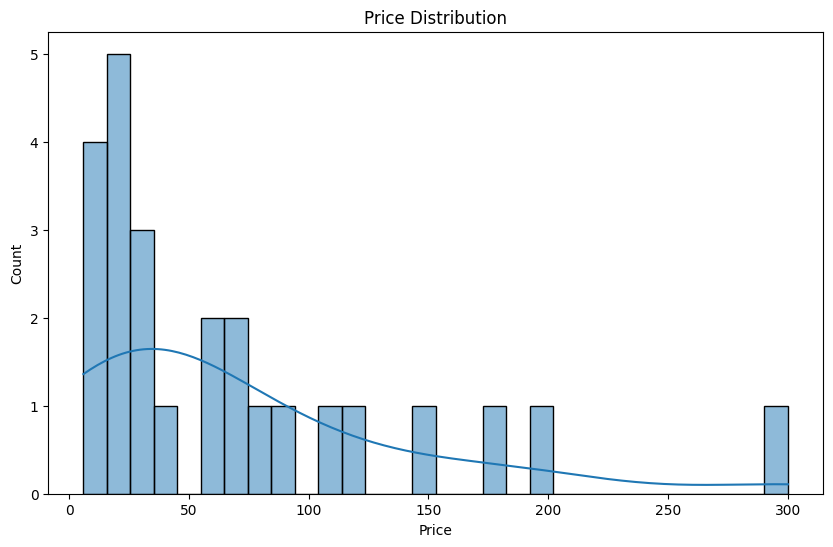

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(products_df['price'].dropna(), bins=30, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


## 💾 Save Datasets
We save the encoded datasets as CSV files to be used later for clustering.

In [18]:
df_encoded_with_price = products_df.copy()

# لإنشاء نسخة بدون عمود السعر
df_encoded_without_price = df_encoded_with_price.drop(columns=['price'])

In [19]:
df_encoded_with_price.to_csv("../Data/products_with_price.csv", index=False)
df_encoded_without_price.to_csv("../Data/products_without_price.csv", index=False)

# Summary

We have loaded, cleaned, and explored the product data.  
This prepares us for further modeling or recommendation system development.
